In [1]:
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

C:\Users\ashis\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:61: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
df = pd.read_csv("Social_Network_Ads.csv")
print(df.shape)
print(df['User ID'].nunique())
df.head(2)

(400, 5)
400


,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0


In [3]:
df.columns

Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

In [4]:
df=df.iloc[:,2:]
df.head(2)

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0


### Train-Test Split

In [26]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(df.drop('Purchased',axis=1),df['Purchased'],test_size=0.3,random_state=0)
print(x_train.shape,x_test.shape)

(280, 2) (120, 2)


### Standard Scaler

In [27]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# fit the scaler to the train set, it will learn the parameters
scaler.fit(x_train)

# transform train and test sets

x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [28]:
scaler.mean_   # mean of variables/features of x_train ['Age','']

array([3.78642857e+01, 6.98071429e+04])

In [29]:
x_train.mean()

Age                   37.864286
EstimatedSalary    69807.142857
dtype: float64

In [30]:
x_train_scaled = pd.DataFrame(x_train_scaled, columns= x_train.columns)
x_test_scaled = pd.DataFrame(x_test_scaled, columns= x_test.columns)

In [31]:
x_train_scaled.mean()

Age                3.489272e-17
EstimatedSalary    6.344132e-17
dtype: float64

In [32]:
x_train.describe()

,Age,EstimatedSalary
count,280.000000,280.000000
mean,37.864286,69807.142857
std,10.218201,34641.201654
min,18.000000,15000.000000
25%,30.000000,43000.000000
50%,37.000000,70500.000000
75%,46.000000,88000.000000
max,60.000000,150000.000000


In [36]:
X_train_scaled.describe()

,Age,EstimatedSalary
count,2.800000e+02,2.800000e+02
mean,3.489272e-17,6.344132e-17
std,1.001791e+00,1.001791e+00
min,-1.947491e+00,-1.584970e+00
25%,-7.710131e-01,-7.752370e-01
50%,-8.473441e-02,2.003677e-02
75%,7.976239e-01,5.261201e-01
max,2.170181e+00,2.319101e+00


In [35]:
import numpy as np
np.round(X_train_scaled.describe(), 1)

,Age,EstimatedSalary
count,280.0,280.0
mean,0.0,0.0
std,1.0,1.0
min,-1.9,-1.6
25%,-0.8,-0.8
50%,-0.1,0.0
75%,0.8,0.5
max,2.2,2.3


## Effect of Scaling

Text(0.5, 1.0, 'After scaling')

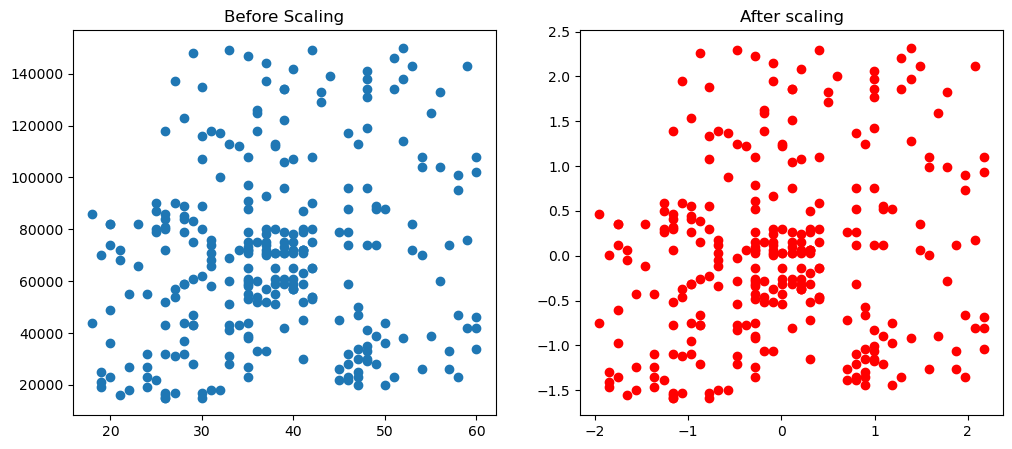

In [39]:
import matplotlib.pyplot as plt

fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(12,5))

ax1.scatter(x_train['Age'],x_train['EstimatedSalary'])
ax1.set_title("Before Scaling")

ax2.scatter(x_train_scaled['Age'],x_train_scaled['EstimatedSalary'],color='red')
ax2.set_title("After scaling")

####  KDE plot 
A KDE plot (Kernel Density Estimation plot) is important because it helps you understand the distribution of continuous data in a smooth, intuitive way.

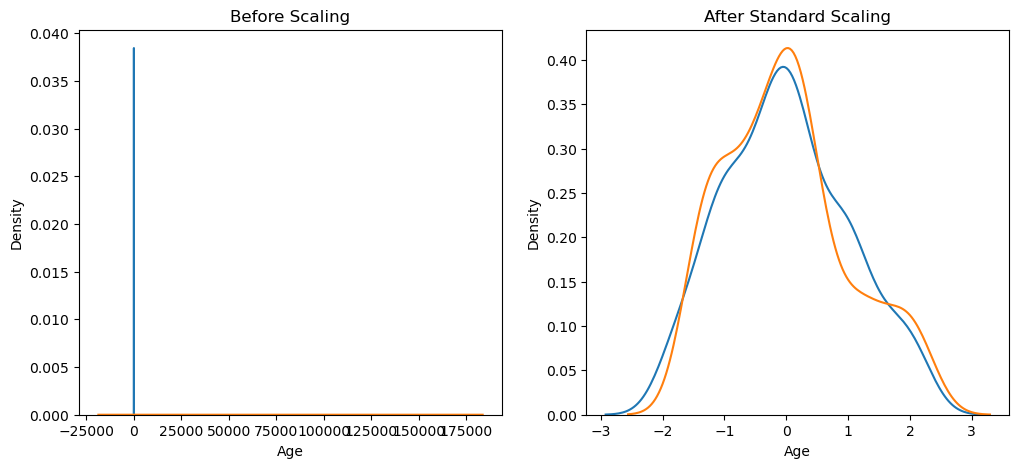

In [44]:
import seaborn as sns
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(x_train['Age'], ax=ax1)
sns.kdeplot(x_train['EstimatedSalary'], ax=ax1)

# after scaling
ax2.set_title('After Standard Scaling')
sns.kdeplot(x_train_scaled['Age'], ax=ax2)
sns.kdeplot(x_train_scaled['EstimatedSalary'], ax=ax2)
plt.show()

### Change in distribution

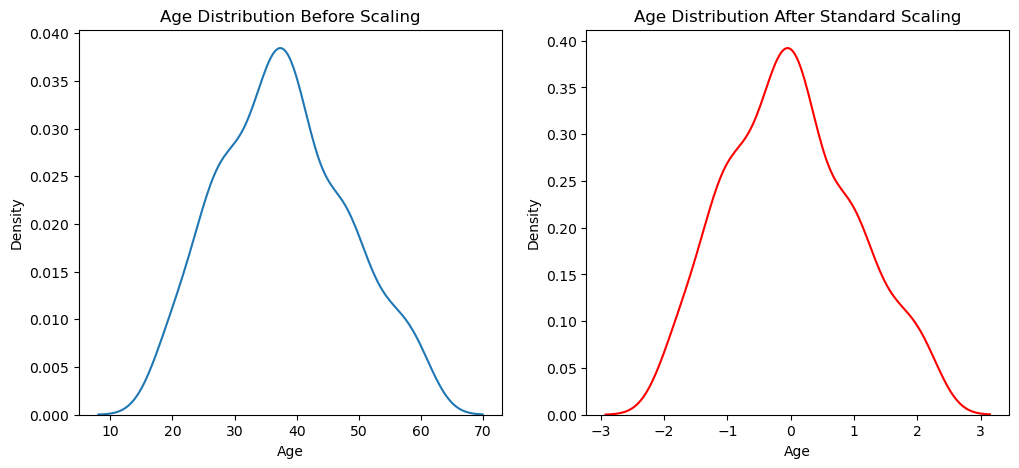

In [47]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Age Distribution Before Scaling')
sns.kdeplot(x_train['Age'], ax=ax1)

# after scaling
ax2.set_title('Age Distribution After Standard Scaling')
sns.kdeplot(x_train_scaled['Age'], ax=ax2,color='red')
plt.show()

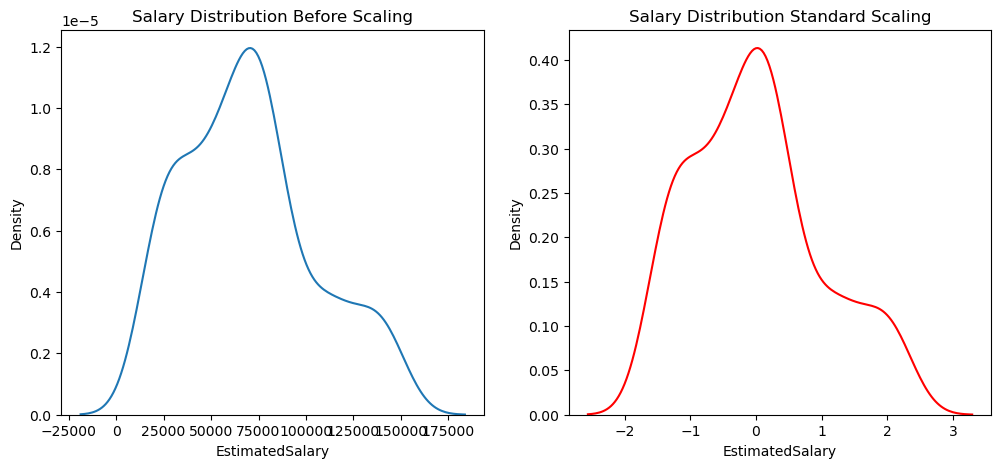

In [48]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Salary Distribution Before Scaling')
sns.kdeplot(x_train['EstimatedSalary'], ax=ax1)

# after scaling
ax2.set_title('Salary Distribution Standard Scaling')
sns.kdeplot(x_train_scaled['EstimatedSalary'], ax=ax2,color='red')
plt.show()

### Why Scaling is important?

In [49]:
from sklearn.linear_model import LogisticRegression

In [50]:
lr= LogisticRegression()
lr_scaled = LogisticRegression()

In [51]:
lr.fit(x_train,y_train)
lr_scaled.fit(x_train_scaled,y_train)

LogisticRegression()

In [52]:
y_pred = lr.predict(x_test)
y_pred_scaled = lr_scaled.predict(x_test_scaled)

In [54]:
from sklearn.metrics import accuracy_score
print("Actual",accuracy_score(y_test,y_pred))
print("Scaled",accuracy_score(y_test,y_pred_scaled))

Actual 0.6583333333333333
Scaled 0.8666666666666667


#### Algorithms where you don't need feature scaling:

Decision trees, Random Forest, Gradient Boost, XGBoost, Catboost (All tree based algorithms)

Reason: Tree models split the data based on order or thresholds, not on distances or magnitudes. So whether a feature is in the range 0-10 or 0-100000, split decision will remain the same.

In [56]:
from sklearn.tree import DecisionTreeClassifier 

In [57]:
dt = DecisionTreeClassifier()
dt_scaled = DecisionTreeClassifier()

In [58]:
dt.fit(x_train,y_train)
dt_scaled.fit(x_train_scaled,y_train)

DecisionTreeClassifier()

In [59]:
y_pred = dt.predict(x_test)
y_pred_scaled = dt_scaled.predict(x_test_scaled)

In [60]:
print("Actual",accuracy_score(y_test,y_pred))
print("Scaled",accuracy_score(y_test,y_pred_scaled))

Actual 0.875
Scaled 0.875


No improvement seen

### Effects of outlier

In [64]:
df = pd.concat([df,pd.DataFrame({'Age': [5, 90, 95],
                                 'EstimatedSalary': [1000, 250000, 350000],
                                 'Purchased': [0, 1, 1]})],
    ignore_index=True)

In [65]:
from sklearn.model_selection import train_test_split

In [68]:
x_train, x_test, y_train, y_test = train_test_split(df.drop('Purchased',axis=1),
                                                    df['Purchased'],
                                                    test_size=0.3,
                                                    random_state=0)
print(x_train.shape,x_test.shape)

(282, 2) (121, 2)


In [71]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

x_train_scaled = pd.DataFrame(x_train_scaled,columns=x_train.columns)
x_test_scaled = pd.DataFrame(x_test_scaled,columns=x_test.columns)

In [72]:
x_train.describe()

,Age,EstimatedSalary
count,282.000000,282.000000
mean,38.148936,69138.297872
std,10.976154,35357.734907
min,5.000000,1000.000000
25%,30.000000,43000.000000
50%,37.000000,68000.000000
75%,46.000000,86750.000000
max,90.000000,250000.000000


In [73]:
np.round(x_train_scaled.describe(),1)

,Age,EstimatedSalary
count,282.0,282.0
mean,0.0,0.0
std,1.0,1.0
min,-3.0,-1.9
25%,-0.7,-0.7
50%,-0.1,-0.0
75%,0.7,0.5
max,4.7,5.1


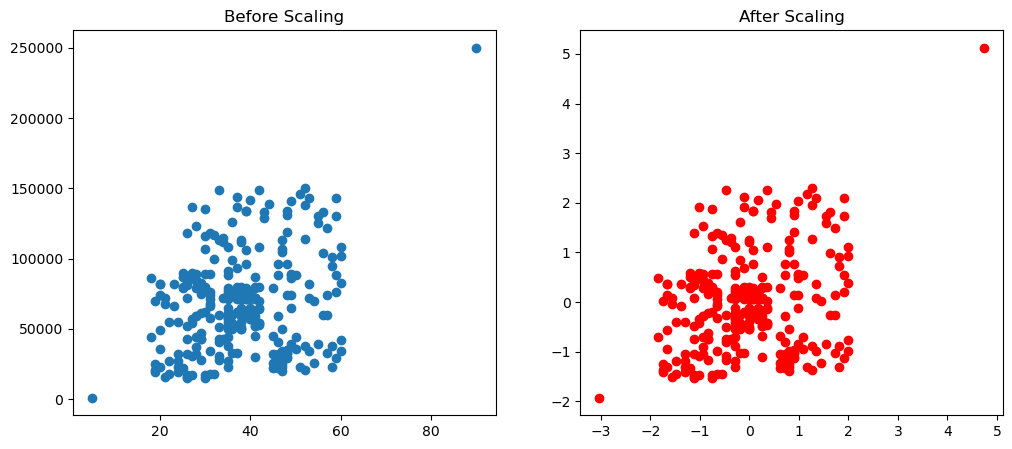

In [77]:
fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(12,5))

ax1.set_title("Before Scaling")
ax1.scatter(x_train['Age'],x_train['EstimatedSalary'])

ax2.set_title("After Scaling")
ax2.scatter(x_train_scaled['Age'],x_train_scaled['EstimatedSalary'],color='red')
plt.show()

# --------------Normalization----------------

In [81]:
df= pd.read_csv("wine_data.csv",header=None,usecols=[0,1,2])
df.columns = ['Class Label','Alcohol','Malic Acid']
print(df.shape)
df.sample(2)

(178, 3)


,Class Label,Alcohol,Malic Acid
110,2,11.46,3.74
90,2,12.08,1.83


In [84]:
df['Class Label'].value_counts()

Class Label
2    71
1    59
3    48
Name: count, dtype: int64

<Axes: xlabel='Alcohol', ylabel='Density'>

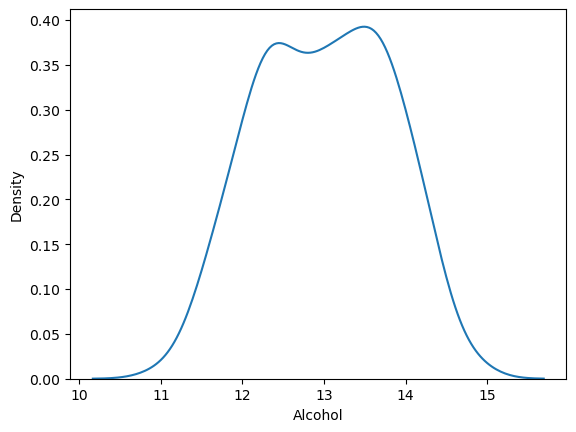

In [85]:
sns.kdeplot(df['Alcohol'])

<Axes: xlabel='Malic Acid', ylabel='Density'>

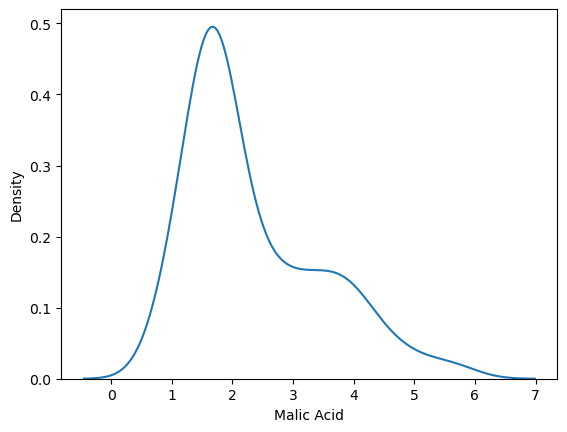

In [86]:
sns.kdeplot(df['Malic Acid'])

<Axes: xlabel='Malic Acid', ylabel='Alcohol'>

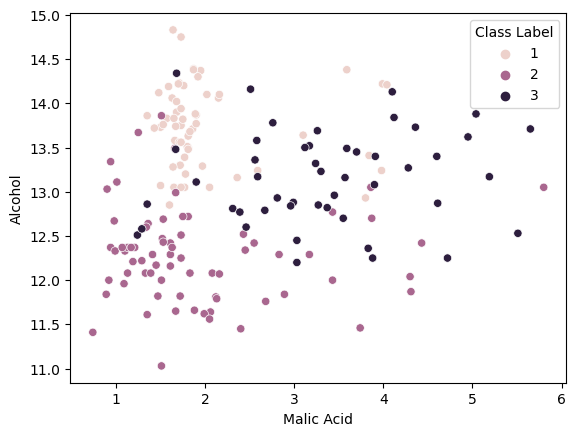

In [88]:
sns.scatterplot(x=df['Malic Acid'],y=df['Alcohol'],hue=df['Class Label'])

In [89]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(df.drop('Class Label',axis=1),
                                                   df['Class Label'],
                                                   test_size=0.3,
                                                   random_state=0)
print(x_train.shape,x_test.shape)

(124, 2) (54, 2)


In [91]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

x_train_scaled = pd.DataFrame(x_train_scaled,columns=x_train.columns)
x_test_scaled = pd.DataFrame(X_test_scaled, columns = x_test.columns)

In [92]:
x_train.describe()

,Alcohol,Malic Acid
count,124.000000,124.000000
mean,12.983065,2.383710
std,0.801340,1.136696
min,11.030000,0.890000
25%,12.362500,1.607500
50%,13.040000,1.885000
75%,13.640000,3.247500
max,14.750000,5.650000


In [93]:
np.round(x_train_scaled.describe(),1)

,Alcohol,Malic Acid
count,124.0,124.0
mean,0.5,0.3
std,0.2,0.2
min,0.0,0.0
25%,0.4,0.2
50%,0.5,0.2
75%,0.7,0.5
max,1.0,1.0


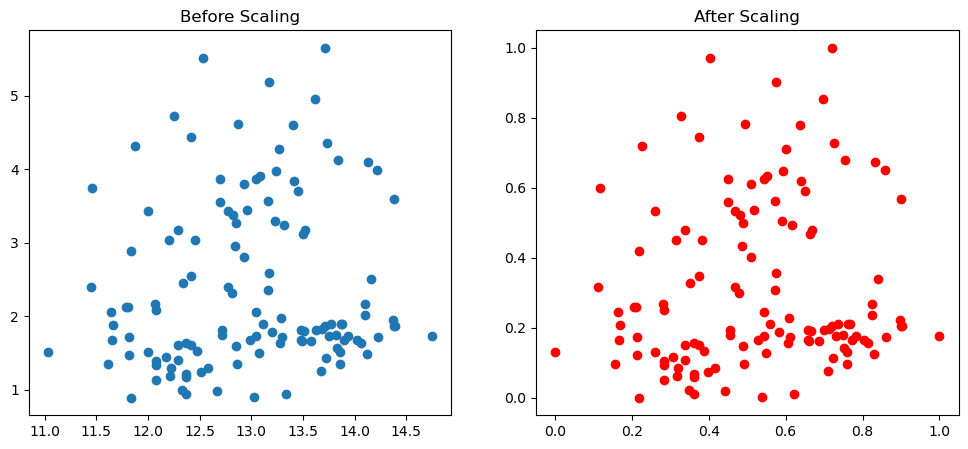

In [96]:
fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(12,5))

ax1.set_title("Before Scaling")
ax1.scatter(x_train['Alcohol'],x_train['Malic Acid'])

ax2.set_title("After Scaling")
ax2.scatter(x_train_scaled['Alcohol'],x_train_scaled['Malic Acid'],color='red')

plt.show()

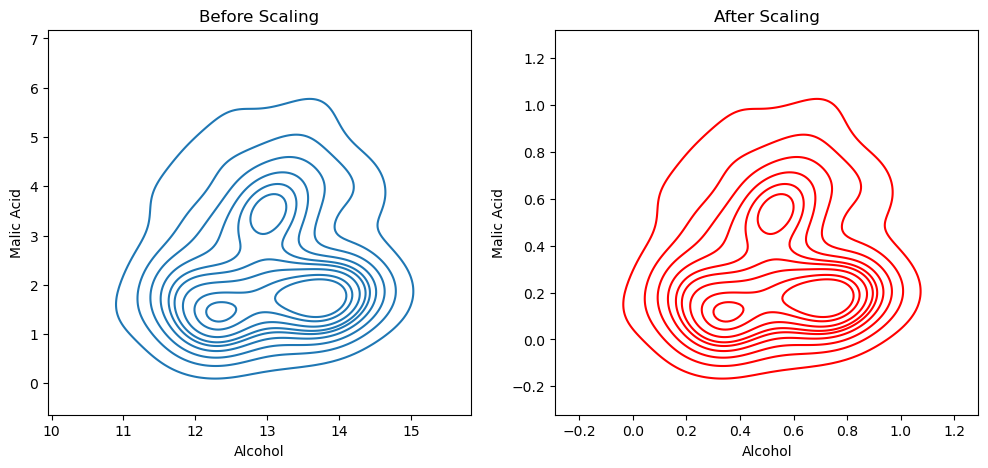

In [98]:
fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(12,5))

ax1.set_title("Before Scaling")
sns.kdeplot(x=x_train['Alcohol'],y=x_train['Malic Acid'],ax=ax1)

ax2.set_title("After Scaling")
sns.kdeplot(x=x_train_scaled['Alcohol'],y=x_train_scaled['Malic Acid'],ax=ax2,color='red')

plt.show()

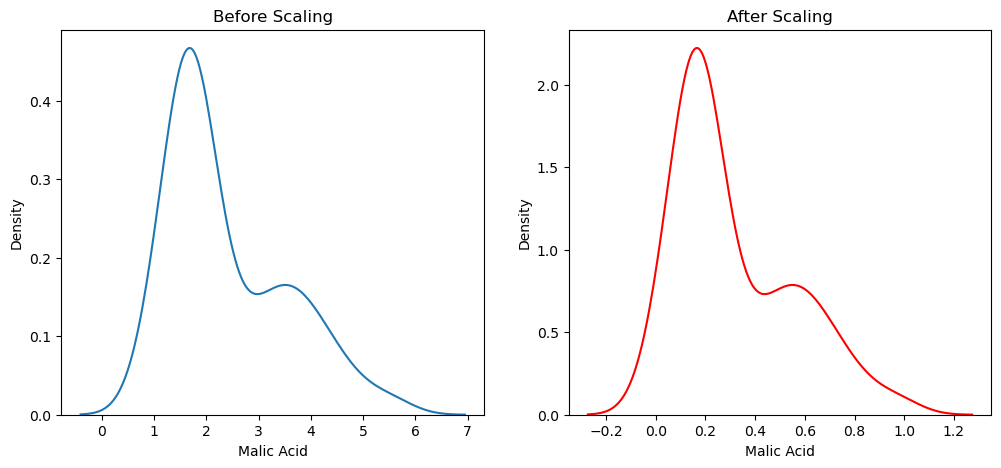

In [100]:
fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(12,5))

ax1.set_title("Before Scaling")
sns.kdeplot(x_train['Malic Acid'],ax=ax1)

ax2.set_title("After Scaling")
sns.kdeplot(x_train_scaled['Malic Acid'],ax=ax2,color='red')

plt.show()

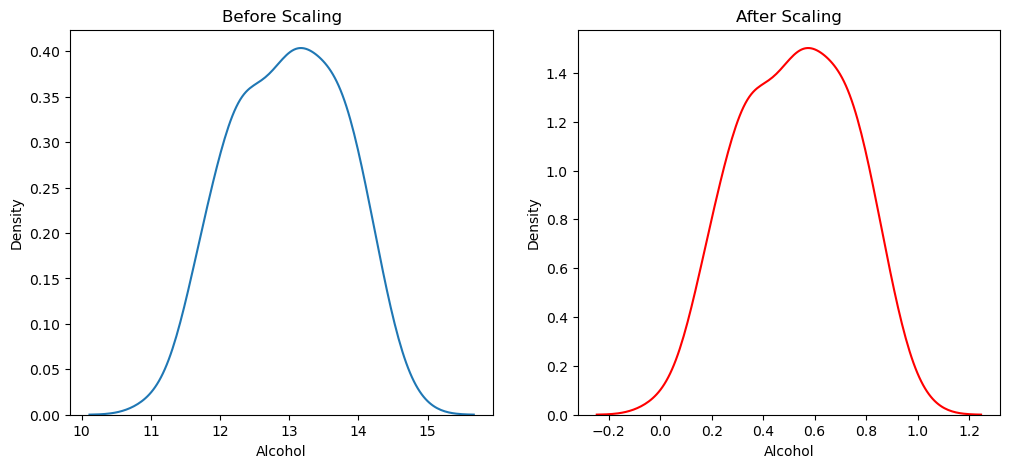

In [107]:
fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(12,5))

ax1.set_title("Before Scaling")
sns.kdeplot(x_train['Alcohol'],ax=ax1)

ax2.set_title("After Scaling")
sns.kdeplot(x_train_scaled['Alcohol'],ax=ax2,color='red')

plt.show()